## HW3 Minimum spanning tree 알고리즘 조사

##### MST 추출 알고리즘 중, Prim 혹은 Sollin 알고리즘 택일 후 조사  
 
1) Core idea  
2) Working example  
    note) Kruskal 알고리즘 시 활용한 예제 그래프 활용  
3) Pseudo code  
4) Time complexity  
  
- 제출 문서: pptx 혹은 pdf

### Psuedo Code

PrimMST(G)  
Input: A weighted graph G = (V, E), where |V| = n, |E| = m  
Output: A minimum spanning tree T  
  
````python
1. Select an arbitrary vertex p from G as the starting point
2. Initialize D[p] = 0 // D stores the minimum weight of edges connecting u and v in T
3. for each vertex v in V, v != p:
4.     if (p, v) is an edge in G:
5.         D[v] = weight of the edge (p, v)
6.     else:
7.         D[v] = infinity
8. T = {p}
9. while the number of vertices in T is less than n:
10.     Find the vertex v_min not in T with the minimum value of D[v_min]
11.     Let (u, v_min) be the edge that connects v_min to a vertex u in T
12.     Add the edge (u, v_min) to T
13.     Add the vertex v_min to T
14.     for each vertex w not in T:
15.         if weight of the edge (v_min, w) < D[w]:
16.             Update D[w] = weight of the edge (v_min, w)
17. return T
````

### Main Code

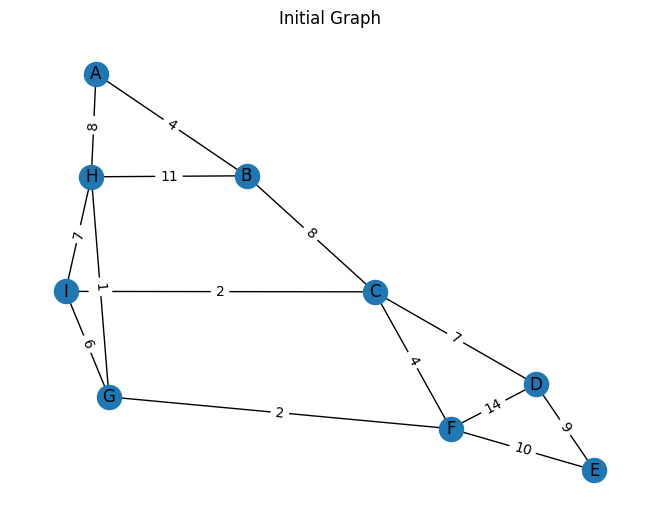

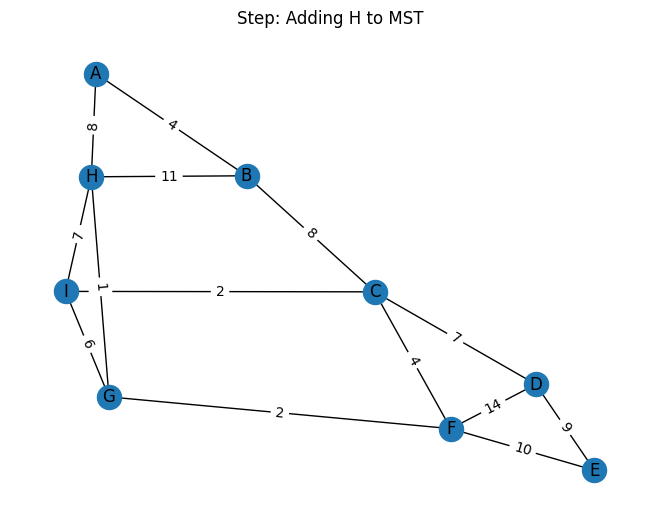

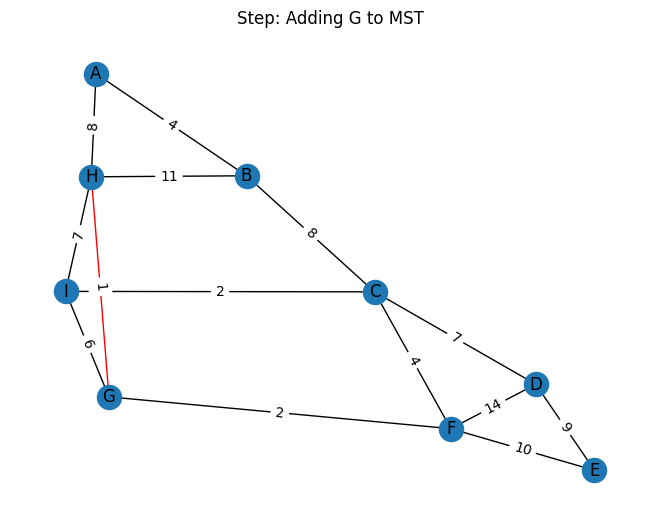

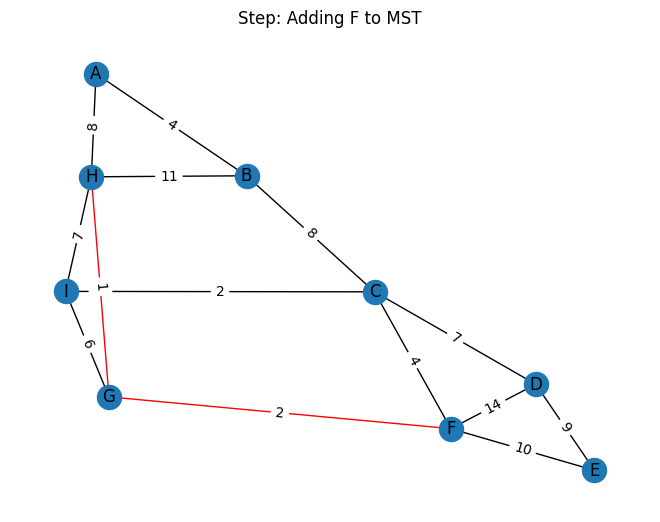

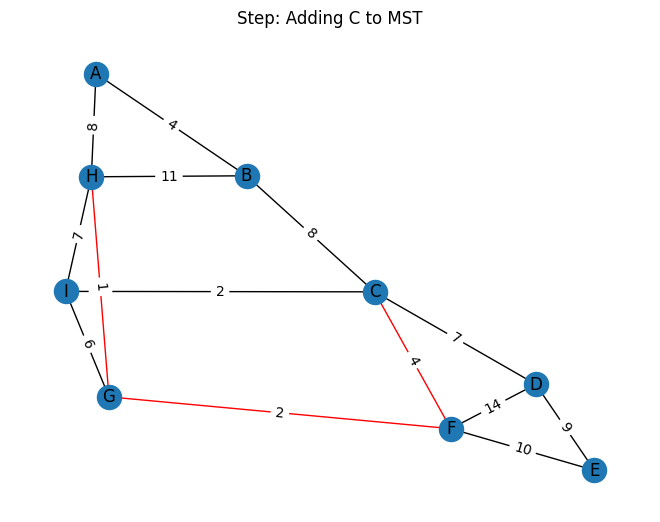

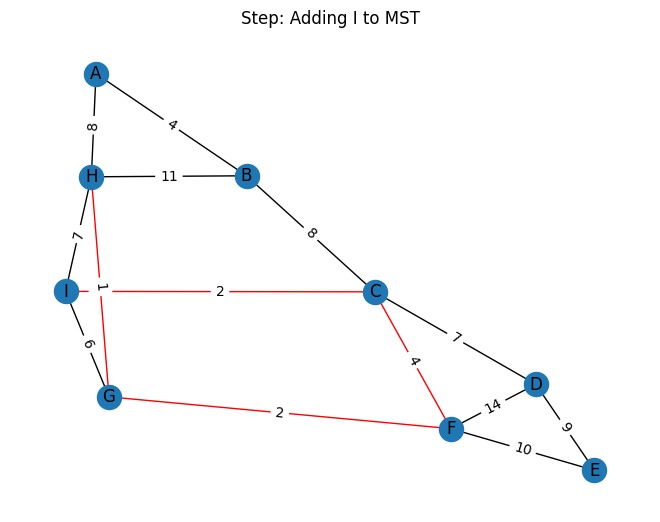

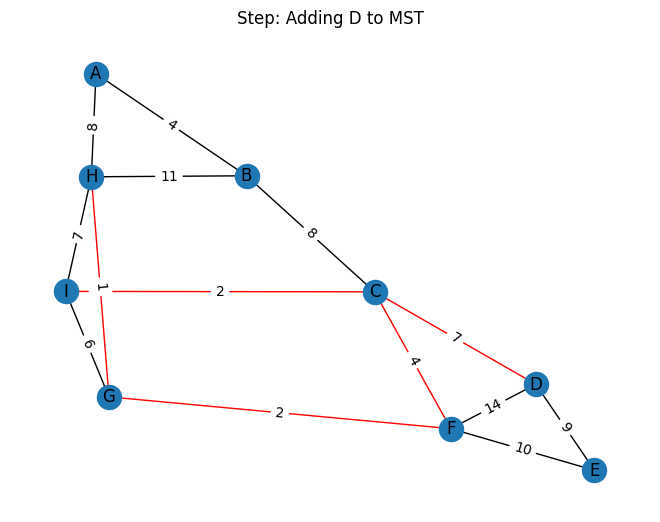

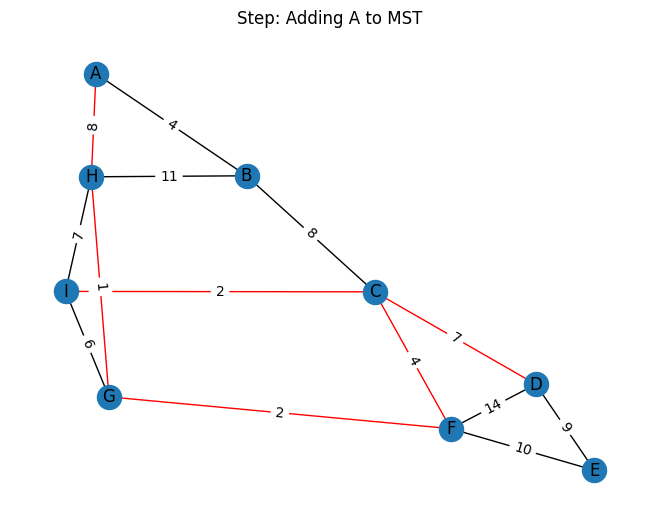

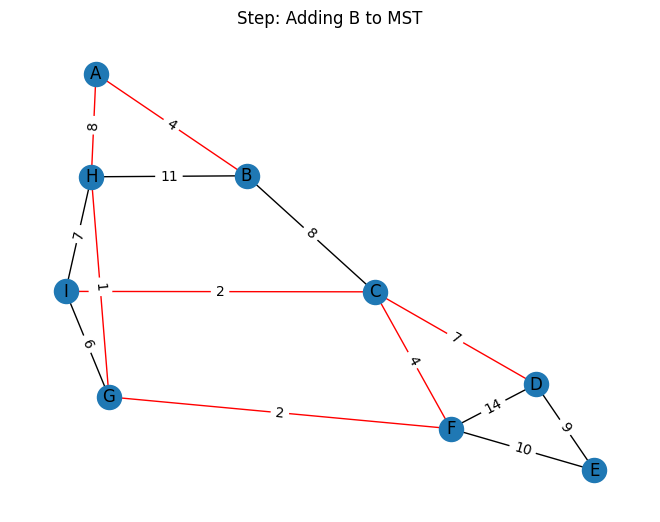

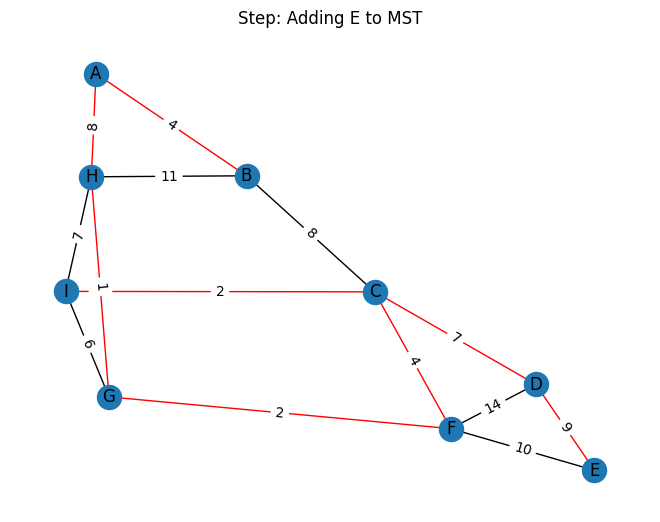

Minimum Spanning Tree:
H - G (weight: 1)
G - F (weight: 2)
F - C (weight: 4)
C - I (weight: 2)
C - D (weight: 7)
H - A (weight: 8)
A - B (weight: 4)
D - E (weight: 9)
Total Weight: 37


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def prim_mst_visualization(graph, start_node):
    mst = []
    visited = set()
    heap = [(0, start_node, None)]  # (가중치, 정점, 부모 정점)
    total_weight = 0

    # 그래프 생성
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight, color='black')

    # 시각화를 위한 초기 레이아웃
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Initial Graph")
    plt.show()

    while heap:
        weight, node, parent = heap.pop(0)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                mst.append((parent, node, weight))
                total_weight += weight

                # 최소 신장 트리 간선 강조
                G.edges[parent, node]['color'] = 'red'

            # 현재 상태 시각화
            edge_colors = [G.edges[u, v].get('color', 'black') for u, v in G.edges]
            nx.draw(G, pos, with_labels=True, edge_color=edge_colors)
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
            plt.title(f"Step: Adding {node} to MST")
            plt.show()

            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heap.append((weight, neighbor, node))
                    heap.sort()

    return mst, total_weight

# 가중치 그래프 생성
graph = {
    'A': [('B', 4), ('H', 8)],
    'B': [('A', 4), ('C', 8), ('H', 11)],
    'C': [('B', 8), ('D', 7), ('F', 4), ('I', 2)],
    'D': [('C', 7), ('E', 9), ('F', 14)],
    'E': [('D', 9), ('F', 10)],
    'F': [('C', 4), ('D', 14), ('E', 10), ('G', 2)],
    'G': [('F', 2), ('H', 1), ('I', 6)],
    'H': [('A', 8), ('B', 11), ('G', 1), ('I', 7)],
    'I': [('C', 2), ('G', 6), ('H', 7)]
}

start_node = 'H'

mst, total_weight = prim_mst_visualization(graph, start_node)
print("Minimum Spanning Tree:")
for edge in mst:
    print(f"{edge[0]} - {edge[1]} (weight: {edge[2]})")
print(f"Total Weight: {total_weight}")